# **Linear Regression Model**

**Option 1 [Challenging]**


---



*   Use the tips dataset and apply a logistic regression model to the tips dataset. Bin a continuous variable (tips column into 3 different categories).
*   Your 3 categories for your continuous variable will be:
    * Bad Tipper
    * Good Tipper
    * Excellent Tipper
*   Also, create a linear regression that predicts the tips column as well.
*   Compare your results from the linear and logistic regression using the following criteria:
    * If your predicted regression is exceeding 10% tolerance (error) then consider it a false prediction, otherwise, it is true.
    * Example: If the actual value is $1 and your prediction is [0.9, 1.10] this is true, otherwise it is false.
    * Compare the false prediction between your classification and regression models and see which one performed better.

The Tips dataset is a data frame with 244 rows and 7 variables.

variables: 
* **tip** in dollars 
* **bill** in dollars
* **sex**of the bill payer
* whether there were **smokers** in the party
* **day** of the week
* **time** of day 
* **size**of the party

In [210]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [211]:
df_assg = sns.load_dataset("tips")
df_assg.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [212]:
df_assg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [213]:
df_assg.shape

(244, 7)

In [214]:
df_assg.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Check if there are missing data!

In [215]:
df_assg.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

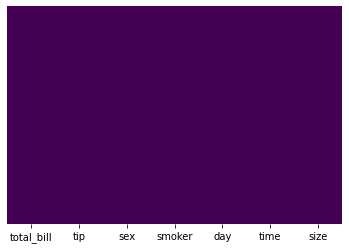

In [216]:
sns.heatmap(df_assg.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [217]:
for i in df_assg.columns:
    print(df_assg[i].unique())

[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17.51 24.52 20.76 31.71 10.59 10.63 50.8

**Visualization**

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

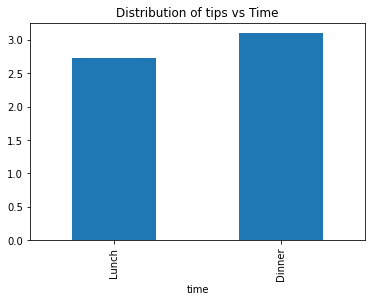

In [218]:
df_assg.groupby(['time'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs Time')
df_assg.groupby(['time'])['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

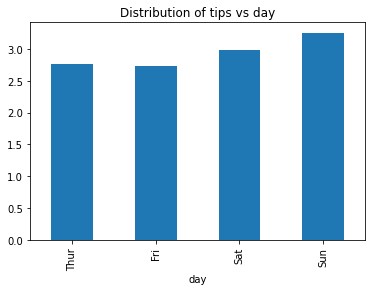

In [219]:
df_assg.groupby(['day'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs day')
df_assg.groupby(['day'])['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

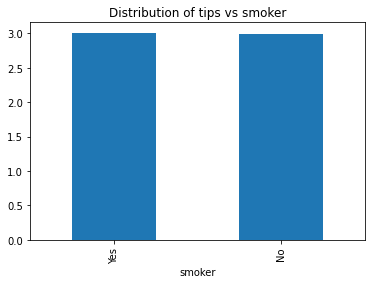

In [220]:
df_assg.groupby(['smoker'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs smoker')
df_assg.groupby(['smoker'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

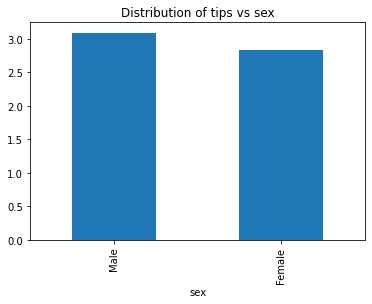

In [221]:
df_assg.groupby(['sex'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs sex')
df_assg.groupby(['sex'])['tip'].mean()

# **Feature Engineering**

**One Hot Encoder**

In [222]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["sex", "smoker","day","time"]

# One Hot encode the column data sets
one_hot_tip = one_hot.fit_transform(df_assg[col_names]).toarray()


In [223]:
# Look at the categories
one_hot.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [224]:
one_hot_tip

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [225]:
one_hot.categories_[0]

array(['Female', 'Male'], dtype=object)

In [226]:
one_hot.categories_[1]

array(['No', 'Yes'], dtype=object)

In [227]:
one_hot.categories_[2]

array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)

In [228]:
one_hot.categories_[3]

array(['Dinner', 'Lunch'], dtype=object)

In [229]:
col_names

['sex', 'smoker', 'day', 'time']

In [230]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['sex_Female',
 'sex_Male',
 'smoker_No',
 'smoker_Yes',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'day_Thur',
 'time_Dinner',
 'time_Lunch']

In [231]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["sex", "smoker","day","time"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [232]:
one_hot_tip.shape

(244, 10)

In [233]:
one_hot_tip

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [234]:
# Cast One Hot Encoded values into a dataframe

oh_df_tips = pd.DataFrame(
    one_hot_tip,
    index=df_assg.index,
    columns = column_names
)

print(oh_df_tips.shape)

(244, 10)


In [235]:
oh_df_tips.head()

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [236]:
merged = pd.concat([df_assg,oh_df_tips],axis='columns')
print(merged.shape)

(244, 17)


In [237]:
merged.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [238]:
Tipper_new = merged.drop(["sex", "smoker","day","time"], axis='columns')
Tipper_new

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [239]:
corr = Tipper_new.corr()
corr.style.background_gradient(cmap='Blues')

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
total_bill,1.000000,0.675734,0.598315,-0.144877,0.144877,-0.085721,0.085721,-0.086168,0.054919,0.122953,-0.138174,0.183118,-0.183118
tip,0.675734,1.000000,0.489299,-0.088862,0.088862,-0.005929,0.005929,-0.055463,-0.002790,0.125114,-0.095879,0.121629,-0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.086195,0.133178,-0.133178,-0.142184,-0.041121,0.193054,-0.072598,0.103411,-0.103411
sex_Female,-0.144877,-0.088862,-0.086195,1.000000,-1.000000,0.002816,-0.002816,0.071060,-0.053957,-0.168106,0.194445,-0.205231,0.205231
sex_Male,0.144877,0.088862,0.086195,-1.000000,1.000000,-0.002816,0.002816,-0.071060,0.053957,0.168106,-0.194445,0.205231,-0.205231
smoker_No,-0.085721,-0.005929,0.133178,0.002816,-0.002816,1.000000,-1.000000,-0.244316,-0.155744,0.181624,0.128534,-0.054921,0.054921
smoker_Yes,0.085721,0.005929,-0.133178,-0.002816,0.002816,-1.000000,1.000000,0.244316,0.155744,-0.181624,-0.128534,0.054921,-0.054921
day_Fri,-0.086168,-0.055463,-0.142184,0.071060,-0.071060,-0.244316,0.244316,1.000000,-0.216319,-0.195451,-0.169608,-0.058159,0.058159
day_Sat,0.054919,-0.002790,-0.041121,-0.053957,0.053957,-0.155744,0.155744,-0.216319,1.000000,-0.500682,-0.434480,0.462709,-0.462709
day_Sun,0.122953,0.125114,0.193054,-0.168106,0.168106,0.181624,-0.181624,-0.195451,-0.500682,1.000000,-0.392566,0.418071,-0.418071


In [240]:
X = Tipper_new[["total_bill",	"size",	"sex_Female",	"sex_Male",	"day_Fri","day_Sat",	"day_Sun",	"day_Thur",	"time_Dinner",	"time_Lunch"]]           

In [241]:
y = Tipper_new.tip
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [243]:
linearmodel = LinearRegression()

In [244]:
linearmodel.fit(X_train,y_train)

LinearRegression()

In [245]:
predictions = linearmodel.predict(X_test)

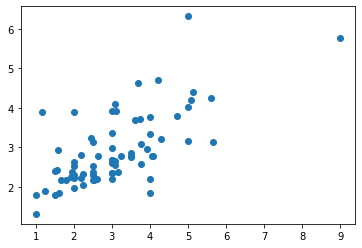

In [246]:
plt.scatter(y_test,predictions)

In [247]:
y_pred = linearmodel.predict(X_test)

print(y_pred)

[2.7712862  3.07661002 2.7842884  1.31972692 3.14291533 1.80510033
 2.55787883 3.12696722 2.86445159 4.62286848 3.1715674  3.20843315
 2.30061152 2.22490291 2.9316959  4.24360156 1.80994028 2.20806087
 2.34168811 3.34929851 3.88409997 2.78248415 2.53573325 2.38717362
 2.31352745 2.52831645 2.81925441 4.69554807 3.78758886 2.32290188
 2.23009303 2.17849849 2.42108455 1.86064243 2.67720127 2.19681631
 2.66927577 1.98663405 5.75735787 3.35989227 2.25692148 2.17403653
 2.60173158 4.39426378 2.05429166 2.75914924 2.5864354  2.97079849
 2.68176927 3.92947931 4.02424437 2.64150556 2.78722377 6.31509615
 1.85859945 2.40863549 4.2016591  3.24767178 2.38045691 2.17478414
 3.76953444 2.36958396 2.99620791 3.71859696 4.09098294 2.34459696
 2.77741953 3.88843644 2.16660045 3.92034882 2.66447455 1.8966158
 3.68200886 2.19261254]


In [248]:
test_dataset = pd.DataFrame(X_test, columns= ["total_bill",	"size",	"sex_Female",	"sex_Male",	"smoker_No","day_Fri","day_Sat",	"day_Sun",	"day_Thur",	"time_Dinner",	"time_Lunch"])

test_dataset['Actual_tip'] = y_test.to_numpy()
test_dataset['Predict_tip'] = y_pred

test_dataset

,total_bill,size,sex_Female,sex_Male,smoker_No,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,Actual_tip,Predict_tip
64,17.59,3,0.0,1.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,2.64,2.771286
63,18.29,4,0.0,1.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,3.76,3.076610
55,19.49,2,0.0,1.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,3.51,2.784288
111,7.25,1,1.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,1.00,1.319727
225,16.27,2,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,2.50,3.142915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,28.97,2,0.0,1.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,3.00,3.920349
101,15.38,2,1.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,3.00,2.664475
75,10.51,2,0.0,1.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,1.25,1.896616
4,24.59,4,1.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,3.61,3.682009


In [249]:
# Counting the records when the actual and the tip are the same
(test_dataset['Actual_tip'] == test_dataset['Predict_tip']).value_counts()

False    74
dtype: int64

In [250]:
coeff_df = pd.DataFrame(linearmodel.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
total_bill,0.089239
size,0.242856
sex_Female,-0.021556
sex_Male,0.021556
day_Fri,0.323162
day_Sat,-0.053214
day_Sun,0.033090
day_Thur,-0.303038
time_Dinner,-0.199509
time_Lunch,0.199509


In [251]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7402337209747055
MSE: 0.9466188794573892
RMSE: 0.9729434102029723


In [252]:
# Score the Model using cross validation

cross_val_score(
    linearmodel, #model
    X_train, 
    y_train, 
    cv=5, 
    scoring="neg_mean_absolute_error" # scoring metric to use 
).mean()

-0.8201780483750157